<a href="https://colab.research.google.com/github/Sai-krishna-9933/Firstrepo/blob/master/Big_Data_Food_Delivery_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import warnings # To avoid deprecation erros in notebook
warnings.filterwarnings('ignore')
import re #For handling regular expressions
import numpy as np #for handling multi dimensional arrays of data
import pandas as pd #for handling structured data
import matplotlib.pyplot as plt # for 2D plotting
import seaborn as sns # for better visualizations
#to plot all graphs in the notebook
%matplotlib inline

In [ ]:
# Loading data and storing the data in a variable for future modifications
df_train = pd.read_excel("/content/Data_Train.xlsx")
df_test = pd.read_excel("/content/Data_Test.xlsx")

In [ ]:
#read train data

df_train.head().style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [ ]:
#read test data

df_test.head().style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, South Indian",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [ ]:
#lets see shape of Trian and Test
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_test.shape)

Number of rows in training dataset (11094, 9)
Number of rows in prediction dataset (2774, 8)


In [ ]:
#take a look of train data columns
df_train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [ ]:
#info of Train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [ ]:
#Check for null values in the dataset
df_train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [ ]:
df_train.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [ ]:
df_test.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


In [ ]:
#Location data of Train and Test sets
print("Train set:\n",df_train["Location"].value_counts())
print("#"*75)
print("\nPrediction set:\n",df_test["Location"].value_counts())

Train set:
 Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra         

In [ ]:
##Cuisines data of Trainset

pd.options.display.max_rows = 50  
pd.DataFrame(df_train["Cuisines"].value_counts())

,Cuisines
North Indian,850
"North Indian, Chinese",614
Fast Food,434
South Indian,270
Chinese,245
...,...
"North Indian, Chinese, Mughlai, Hyderabadi",1
"Continental, Chinese, Italian, Burger, Salad",1
"Beverages, Coffee",1
"Ice Cream, Beverages, Pizza",1


In [ ]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [ ]:
df_test.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [ ]:
##Average_Cost data of Train and Test sets

print("Train set:\n\n",df_train["Average_Cost"].value_counts(),'\n')
print("#"*75)
print("\nPrediction set:\n\n",df_test["Average_Cost"].value_counts())

Train set:

 ₹200      3241
₹100      2557
₹150      2462
₹250       881
₹300       537
₹350       283
₹400       282
₹50        265
₹600       154
₹500       101
₹450        63
₹550        60
₹650        55
₹800        44
₹750        38
₹900        15
₹700        15
₹1,000      12
₹850        12
₹1,200       8
₹950         4
₹1,150       1
for          1
₹1,100       1
₹1,400       1
₹2,050       1
Name: Average_Cost, dtype: int64 

###########################################################################

Prediction set:

 ₹200      820
₹100      664
₹150      589
₹250      223
₹300      173
₹50        72
₹350       71
₹400       64
₹600       30
₹500       15
₹550       13
₹450        9
₹650        8
₹800        6
₹850        4
₹1,000      4
₹700        4
₹750        3
₹1,200      2
Name: Average_Cost, dtype: int64


In [ ]:
###Cleaning Average_Cost data of Train and Test sets

df_train.Average_Cost = df_train.Average_Cost.apply(lambda x: x.replace('₹',''))
df_train.Average_Cost = df_train.Average_Cost.apply(lambda x: x.replace(',',''))

print("Train set:\n",df_train.Average_Cost.value_counts(),'\n')

print("#"*75,"\n")

df_test.Average_Cost = df_test.Average_Cost.apply(lambda x: x.replace('₹',''))
df_test.Average_Cost = df_test.Average_Cost.apply(lambda x: x.replace(',',''))

print("\nPrediction set:",df_test.Average_Cost.value_counts())

Train set:
 200     3241
100     2557
150     2462
250      881
300      537
350      283
400      282
50       265
600      154
500      101
450       63
550       60
650       55
800       44
750       38
900       15
700       15
1000      12
850       12
1200       8
950        4
1150       1
for        1
1100       1
1400       1
2050       1
Name: Average_Cost, dtype: int64 

########################################################################### 


Prediction set: 200     820
100     664
150     589
250     223
300     173
50       72
350      71
400      64
600      30
500      15
550      13
450       9
650       8
800       6
850       4
1000      4
700       4
750       3
1200      2
Name: Average_Cost, dtype: int64


In [ ]:
df_train[df_train.Average_Cost == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [ ]:
df_train.drop(df_train.loc[df_train.Average_Cost =='for'].index, inplace=True)

In [ ]:
df_train.Average_Cost      = df_train.Average_Cost.astype(np.int64)
df_test.Average_Cost = df_test.Average_Cost.astype(np.int64)

<Axes: ylabel='Frequency'>

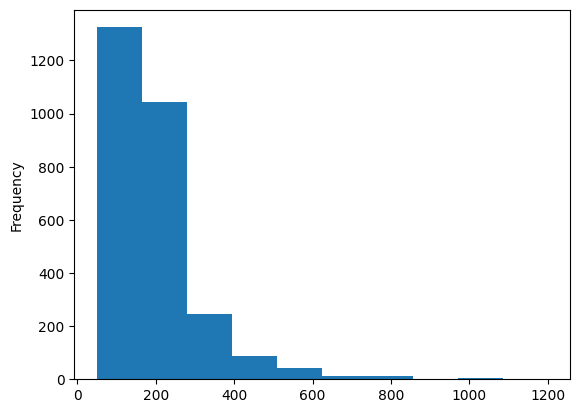

In [ ]:
df_test.Average_Cost.plot.hist()

In [ ]:
#Minimum_Order data of Train and Test sets

print("Train set:\n",df_train.Minimum_Order.value_counts(), "\n")
print("#"*75)
print("\nPrediction set:\n",df_test.Minimum_Order.value_counts())

Train set:
 ₹50     10117
₹99       779
₹0        158
₹199        8
₹200        8
₹299        3
₹59         3
₹350        3
₹79         2
₹90         2
₹450        2
₹300        2
₹400        1
₹250        1
₹150        1
₹240        1
₹89         1
₹500        1
Name: Minimum_Order, dtype: int64 

###########################################################################

Prediction set:
 ₹50     2556
₹99      177
₹0        30
₹199       5
₹200       2
₹500       1
₹149       1
₹399       1
₹89        1
Name: Minimum_Order, dtype: int64


In [ ]:
#cleaning Minimum_Order data of Train and Test sets


df_train.Minimum_Order = df_train.Minimum_Order.apply(lambda x: x.replace('₹','')).astype(np.int64)

print("Train set:\n",df_train.Minimum_Order.value_counts(),"\n")

print("#"*75,"\n")

df_test.Minimum_Order = df_test.Minimum_Order.apply(lambda x: x.replace('₹','')).astype(np.int64)

print("\nPrediction set:",df_test.Minimum_Order.value_counts())

Train set:
 50     10117
99       779
0        158
199        8
200        8
299        3
59         3
350        3
79         2
90         2
450        2
300        2
400        1
250        1
150        1
240        1
89         1
500        1
Name: Minimum_Order, dtype: int64 

########################################################################### 


Prediction set: 50     2556
99      177
0        30
199       5
200       2
500       1
149       1
399       1
89        1
Name: Minimum_Order, dtype: int64


---
- There no chance of Minimum order value can be Zero so we can impute with mean value 
---

In [ ]:
##after cleaning Minimum_Order data of Train and Test sets converting them into int datatype

df_train.Minimum_Order      = df_train.Minimum_Order.astype(np.int64)
df_test.Minimum_Order = df_test.Minimum_Order.astype(np.int64)

In [ ]:
df_train.Minimum_Order.mean()

53.344812043631116

In [ ]:
#Replace mean value in '0'value
df_train.Minimum_Order = df_train.Minimum_Order.replace(0,53)

In [ ]:
df_test.Minimum_Order.mean()

53.30028839221341

In [ ]:
#Replace mean value in '0'value
df_test.Minimum_Order = df_test.Minimum_Order.replace(0,53)

In [ ]:
#Minimum_Order data of Train and Test sets

print("Train set:\n",df_train.Minimum_Order.value_counts(), "\n")
print("#"*75)
print("\nPrediction set:\n",df_test.Minimum_Order.value_counts())

Train set:
 50     10117
99       779
53       158
199        8
200        8
299        3
59         3
350        3
79         2
90         2
450        2
300        2
400        1
250        1
150        1
240        1
89         1
500        1
Name: Minimum_Order, dtype: int64 

###########################################################################

Prediction set:
 50     2556
99      177
53       30
199       5
200       2
500       1
149       1
399       1
89        1
Name: Minimum_Order, dtype: int64


In [ ]:
#Rating data of Train and Test sets

print("Train set:\n",df_train.Rating.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_test.Rating.value_counts())

Train set:
 -                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    757
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
2.4                     13
4.8                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.2                      1
2.1                      1
Name: Rating, dtype: int64 

####################################################################

In [ ]:
#so we have symbol "-", "NEW", "Opening Soon" and "Temporarily Closed" in Rating Columns
#so i want to impute mean value in those 

df_train.Rating = df_train.Rating.replace('-',0)
df_train.Rating = df_train.Rating.replace('NEW',0)
df_train.Rating = df_train.Rating.replace('Opening Soon',0)
df_train.Rating = df_train.Rating.replace('Temporarily Closed',0)

In [ ]:
#Rating into float64 type
df_train.Rating = df_train.Rating.astype(np.float64)

In [ ]:
#mean of Rating
df_train.Rating.mean()

2.9743531957090057

In [ ]:
#Replace mean value in '0'value
df_train.Rating = df_train.Rating.replace(0,2.9)

In [ ]:
#so we have symbol "-", "NEW", "Opening Soon" in Rating Column od Test set
#so i want to impute mean value in those 

df_test.Rating = df_test.Rating.replace('-',0)
df_test.Rating = df_test.Rating.replace('NEW',0)
df_test.Rating = df_test.Rating.replace('Opening Soon',0)

In [ ]:
#into Float64 type
df_test.Rating = df_test.Rating.astype(np.float64)

In [ ]:
#mean of test set
df_test.Rating.mean()

2.9420692141312186

In [ ]:
#replacing mean value in Test set of Rating
df_test.Rating = df_test.Rating.replace(0,2.9)

In [ ]:
#after cleaning of Train and Test sets

print("Train set:\n",df_train.Rating.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_test.Rating.value_counts())

Train set:
 -                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    757
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
2.4                     13
4.8                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.2                      1
2.1                      1
Name: Rating, dtype: int64 

####################################################################

In [ ]:
#Votes data of train and test sets
print("Train set:\n",df_train.Votes.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_test.Votes.value_counts())

Train set:
 -       2073
4        248
6        200
7        182
9        181
        ... 
1106       1
935        1
663        1
1116       1
3700       1
Name: Votes, Length: 1103, dtype: int64 

########################################################################### 


Prediction set:
 -       542
7        60
9        57
6        55
5        51
       ... 
403       1
394       1
716       1
268       1
1256      1
Name: Votes, Length: 580, dtype: int64


In [ ]:
#applying same trick to impute meann value in Votes in '0'
df_train.Votes = df_train.Votes.replace('-',0)
df_train.Votes = df_train.Votes.astype(np.int64)

In [ ]:
df_train.Votes.mean()

198.84530785179842

In [ ]:
df_train.Votes = df_train.Votes.replace(0,199)

In [ ]:
#applying same trick to impute mnean value in Votes in '0' in Test Set

df_test.Votes = df_test.Votes.replace('-',0)
df_test.Votes = df_test.Votes.astype(np.int64)

In [ ]:
df_test.Votes.mean()

182.58976207642394

In [ ]:
df_train.Votes = df_train.Votes.replace(0,182)

In [ ]:
print("Train set:\n",df_train.Votes.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_test.Votes.value_counts())

Train set:
 199     2080
4        248
6        200
7        182
9        181
        ... 
1106       1
935        1
663        1
1116       1
3700       1
Name: Votes, Length: 1102, dtype: int64 

########################################################################### 


Prediction set:
 0       542
7        60
9        57
6        55
5        51
       ... 
403       1
394       1
716       1
268       1
1256      1
Name: Votes, Length: 580, dtype: int64


In [ ]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [ ]:
#imputing Review mean in train set
df_train.Reviews = df_train.Reviews.replace('-',0)
df_train.Reviews = df_train.Reviews.astype(np.int64)

In [ ]:
df_train.Reviews.mean()

97.57171189038132

In [ ]:
df_train.Reviews = df_train.Reviews.replace(0,97)

In [ ]:
##imputing Review mean in Test set

df_test.Reviews = df_test.Reviews.replace('-',0)
df_test.Reviews = df_test.Reviews.astype(np.int64)

In [ ]:
df_test.Reviews.mean()

87.59444844989186

In [ ]:
df_test.Reviews = df_test.Reviews.replace(0,87)

In [ ]:
#after cleaing Review column for train and test sets
print("Train set:\n",df_train.Reviews.value_counts(), "\n")

print("#"*75,"\n")

print("\nPrediction set:\n",df_test.Reviews.value_counts())

Train set:
 -       2311
2        420
3        387
1        381
4        356
        ... 
1501       1
983        1
343        1
397        1
549        1
Name: Reviews, Length: 761, dtype: int64 

########################################################################### 


Prediction set:
 87     597
2      131
1      102
3       79
4       72
      ... 
664      1
594      1
495      1
169      1
731      1
Name: Reviews, Length: 391, dtype: int64


In [ ]:
#Lets see the Target column
df_train.Delivery_Time

0        30 minutes
1        30 minutes
2        65 minutes
3        30 minutes
4        65 minutes
            ...    
11089    30 minutes
11090    30 minutes
11091    30 minutes
11092    30 minutes
11093    30 minutes
Name: Delivery_Time, Length: 11093, dtype: object

In [ ]:
#after cleaning of non-object datatypes of train and test sets
print("\nTrain set:\n\n",df_train.dtypes, "\n")
 
print("#"*75,"\n")

print("\nPrediction set:\n\n",df_test.dtypes)


Train set:

 Restaurant       object
Location         object
Cuisines         object
Average_Cost      int64
Minimum_Order     int64
Rating           object
Votes             int64
Reviews          object
Delivery_Time    object
dtype: object 

########################################################################### 


Prediction set:

 Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
dtype: object


In [ ]:
df_train.describe()

,Average_Cost,Minimum_Order,Votes
count,11093.000000,11093.000000,11093.000000
mean,202.708916,54.099703,236.033354
std,129.839111,17.409059,500.857756
min,50.000000,50.000000,3.000000
25%,100.000000,50.000000,26.000000
50%,200.000000,50.000000,106.000000
75%,200.000000,50.000000,199.000000
max,2050.000000,500.000000,9054.000000


In [ ]:
df_test.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,195.385725,53.873468,3.472098,182.589762,106.192502
std,114.509785,17.766107,0.458875,480.784022,259.604760
min,50.000000,50.000000,2.100000,0.000000,1.000000
25%,100.000000,50.000000,3.000000,6.000000,10.000000
50%,200.000000,50.000000,3.500000,35.500000,48.000000
75%,200.000000,50.000000,3.800000,148.750000,87.000000
max,1200.000000,500.000000,4.800000,7811.000000,3863.000000


In [ ]:
df_train.keys()

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

<Axes: >

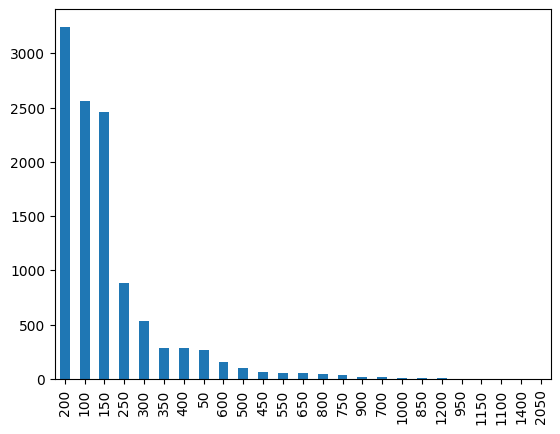

In [ ]:
df_train.Average_Cost.value_counts().plot.bar()

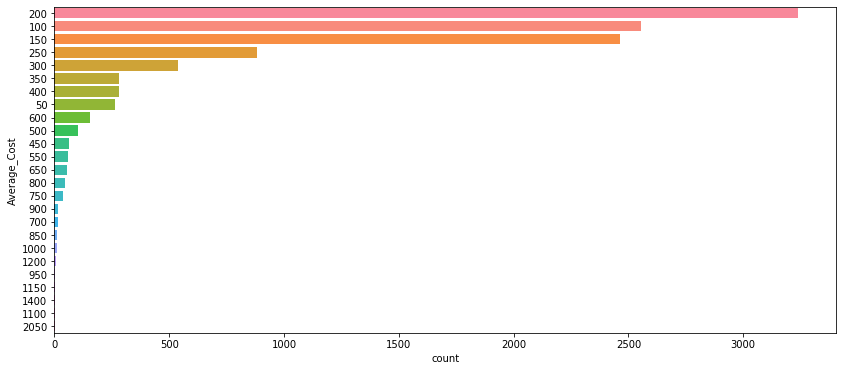

In [ ]:
#Average_Cost influence
plt.figure(figsize=(14,6))

sns.countplot(y = df_train.Average_Cost, order=df_train.Average_Cost.value_counts().index, saturation=3)

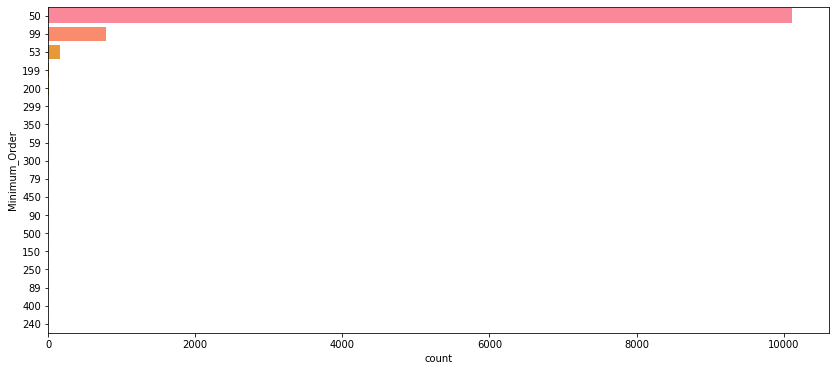

In [ ]:
#Minimum_Order data
plt.figure(figsize=(14,6))

sns.countplot(y = df_train.Minimum_Order, order=df_train.Minimum_Order.value_counts().index, saturation=3)

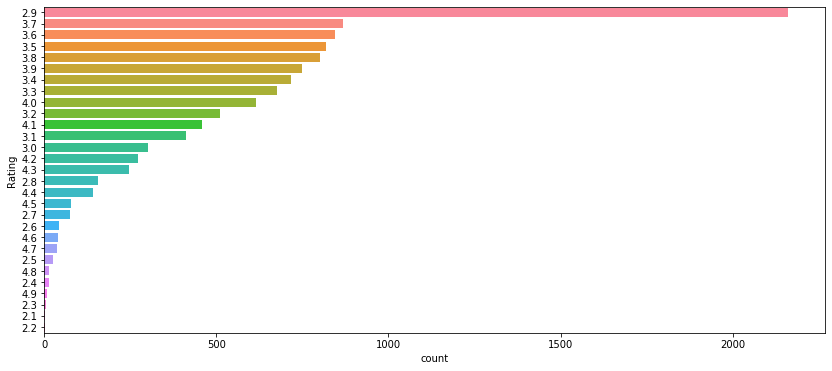

In [ ]:
#Rating info
plt.figure(figsize=(14,6))
sns.countplot(y = df_train.Rating, order=df_train.Rating.value_counts().index, saturation=3)

In [ ]:
#lets work on object datatypes
#take a look on train Location column which are unique
df_train.Location.nunique()

In [ ]:
#unique points in Cuisines
df_train.Cuisines.nunique()

---
- whenever there is a need to use object variables in ML modesl we have to convert them into Algorithm understandable way

- so we are not using one-hot encodig due to curse of dimentionality 

- finally i'm using Label encoder to convert unique values
---

In [ ]:
# Categorical boolean mask
categorical_cols = df_train.columns[:3].tolist()

In [ ]:
categorical_cols

['Restaurant', 'Location', 'Cuisines']

In [ ]:
# Categorical boolean mask for test data set

p_categorical_cols = df_test.columns[:3].tolist()

In [ ]:
p_categorical_cols

['Restaurant', 'Location', 'Cuisines']

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))
df_train[categorical_cols]

,Restaurant,Location,Cuisines
0,5086,10,995
1,1785,30,1116
2,571,19,1182
3,4708,28,1398
4,4896,26,388
...,...,...,...
11089,6772,0,2166
11090,3461,29,860
11091,2273,16,2036
11092,2970,30,1412


In [ ]:
# apply le on categorical feature columns
df_test[p_categorical_cols] = df_test[p_categorical_cols].apply(lambda col: le.fit_transform(col))
df_test[p_categorical_cols]

,Restaurant,Location,Cuisines
0,580,17,586
1,1959,17,104
2,1123,28,326
3,1404,1,517
4,706,28,215
...,...,...,...
2769,1682,8,338
2770,2321,17,296
2771,1905,22,14
2772,453,4,37


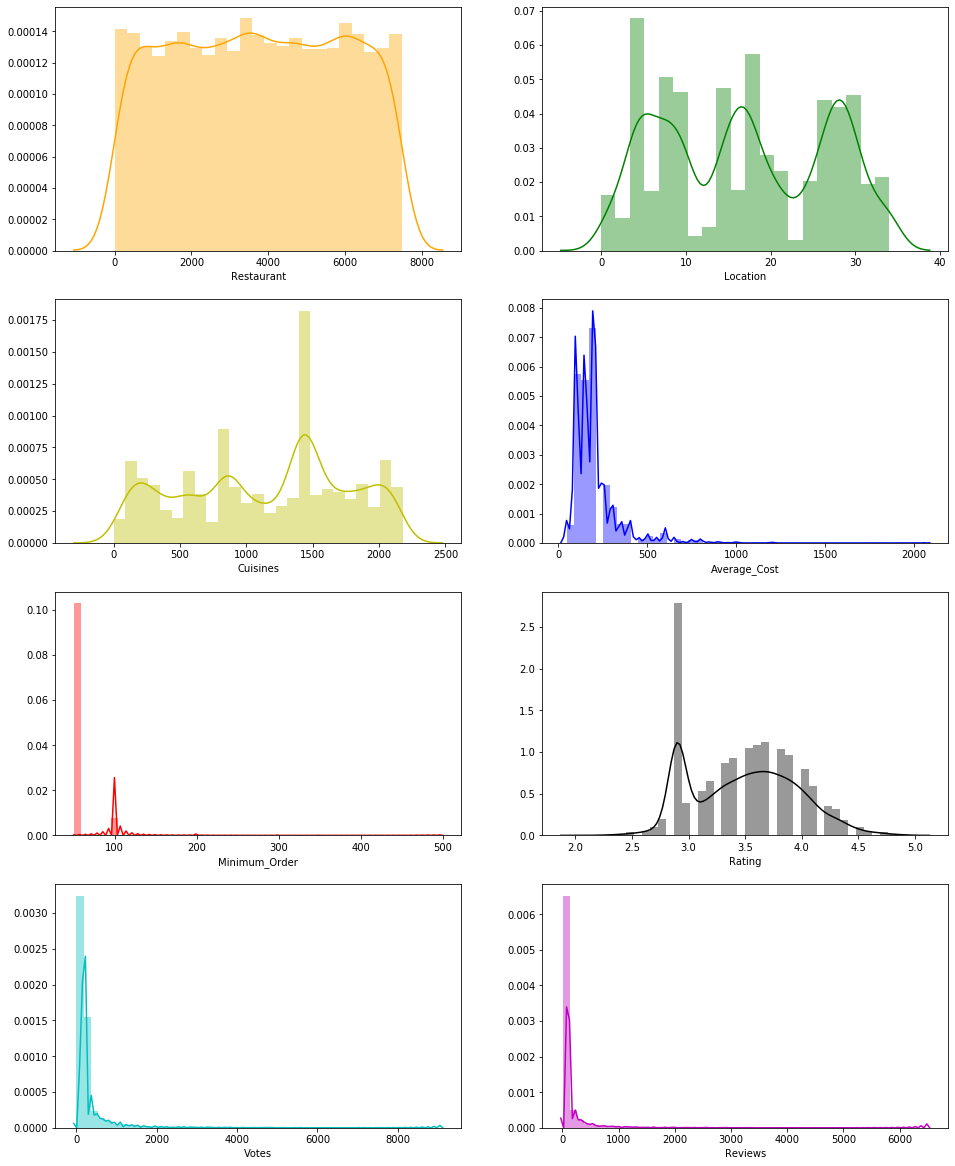

In [ ]:
# Let us check the distribution graphs for our data
plt.figure(figsize=(16,26))
c = ['r','Orange','g','y','b','r','k','c','m']
for i in np.arange(1,9):
    plt.subplot(5,2,i)
    sns.distplot(df_train[df_train.columns[i-1]], color=c[i])

# Data Insights

(8.0, 0.0)

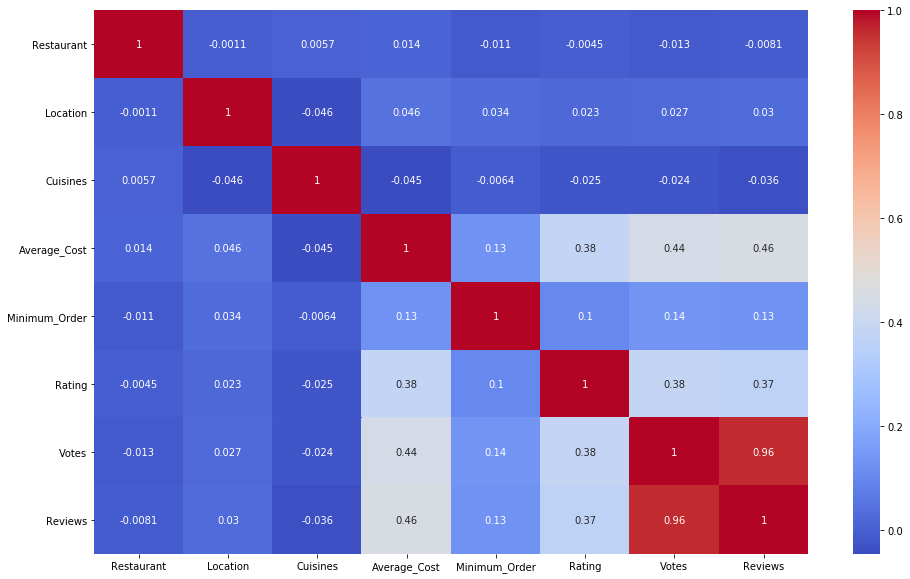

In [ ]:
# Correlation between the data columns in training data
plt.figure(figsize=(16,10))
ax = sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
Submission_data = pd.read_excel("Sample_Submission.xlsx")
Submission_data

,Delivery_Time
0,120 minutes
1,20 minutes
2,20 minutes
3,65 minutes
4,45 minutes
...,...
2769,80 minutes
2770,65 minutes
2771,120 minutes
2772,120 minutes


In [ ]:
df_train.Delivery_Time.unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [ ]:
# Since we need to send our final predictions made on test dataset in excel format
# the below function can be used to generate excel file for a given model which can then be submitted
# to the hackathon
# def generateFinalPredictionFile(model):
#     y_test_pred = model.predict(X_to_predict.values)
#     y_test_pred_exp = np.exp(y_test_pred)
#     print(y_test_pred_exp)
#     pd.DataFrame(y_test_pred_exp, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
df_train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


## Split the Data

In [ ]:
#Except the targeted RESPONSE variables we are taking all the variables as inputs 
X = df_train.drop('Delivery_Time', axis=1)

X.shape

(11093, 8)

In [ ]:
#Use RESPONSE as label
y = df_train['Delivery_Time']

y.shape

(11093,)

In [ ]:
from sklearn.model_selection import train_test_split

#Create train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=29)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7765, 8) (3328, 8) (7765,) (3328,)


In [ ]:
from sklearn import linear_model
from sklearn import ensemble
import statsmodels.formula.api as smf

lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
#lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)